# About this file
This dataset includes the examination of the course grades of high school students in the United States and the analysis of the factors affecting the course success of the students.(Bu data seti Amerika Birleşik Devletleri'ndeki lise ogrencilerinin ders notlarinin incelenmesini ve ogrencilerin ders basarilarini etkileyen faktorlerin analiz edilmesini icermektedir.)

The main aim of this kernel is to analyse how are the scores impacted based on different variables which include gender, race, lunch, test preparation course etc...
Each column is picked and has been analysed how they affect the scores. For easy understanding I have used graphs and plots.
After all visualisation is the best way to understand....(Bu çekirdeğin temel amacı, cinsiyet, ırk, öğle yemeği, sınava hazırlık kursu vb. gibi farklı değişkenlere göre puanların nasıl etkilendiğini analiz etmektir.
Her bir sütun seçilmiş ve puanları nasıl etkiledikleri analiz edilmiştir. Kolay anlaşılması için grafikler ve çizimler kullandım.
Sonuçta görselleştirme.... anlamanın en iyi yoludur.)
* **gender** : the gender of the students (ogrencilerin cinsiyeti)
* **race/ethnicity** : students' race, ethnicity (ogrencilerin irki, etnik kokeni)
* **parental level of education** : students' parental education level (ogrencilerin ebeveyn egitim duzeyi)
* **lunch** : students' lunch status (ogrencilerin ogle yemegini durumu)
* **test preparation course** :exam preparation course status of students (ogrencilerin sinava hazirlik kurs durumu)
* **math score** : students' math class grades (ogrencilerin matematik dersi notlari)
* **reading score** : students' reading lesson notes (ogrencilerin okuma dersi notlari)
* **writing score** : students' writing class notes (ogrencilerin yazma dersi notlari)

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the csv file using 
df =pd.read_csv('StudentsPerformance.csv')


# Recognizing data(Datayi Tanima)

In [3]:
# Getting the top 8 rows of the dataframe
df.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


In [6]:
# Look at 10 random data
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
109,female,group B,some high school,standard,none,70,64,72
925,male,group E,some high school,standard,completed,74,64,60
706,male,group D,high school,standard,none,46,34,36
841,male,group C,some high school,standard,none,64,58,51
193,male,group D,some college,standard,completed,77,62,62
497,female,group D,some college,free/reduced,completed,59,78,76
702,male,group A,bachelor's degree,standard,completed,87,84,87
266,female,group C,bachelor's degree,standard,none,63,75,81
784,male,group C,bachelor's degree,standard,completed,91,81,79
787,female,group B,some college,standard,none,19,38,32


In [7]:
# Getting the last 5 rows of the data frame
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [9]:
# Check the number of rows and columns in the dataframe
df.shape

(1000, 8)

In [10]:
# Check the summary for the numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [11]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# Check missing values in all columns
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Making the column names in the dataset useful

In [13]:
# See all column names
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
# Make column names useful

df.rename(columns={
    "gender": "gender",
    "race/ethnicity": "race_ethnicity",
    "parental level of education": "parental_level_of_education",
    "lunch": "lunch",
    "test preparation course": "test_preparation_course",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score",
    "Rating": "rating",
    "Votes": "votes",
    "Revenue (Millions)": "revenue",
    "Metascore": "metascore"
},inplace=True)

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Creating a Total Score Column

In [16]:
# adding the math score, reading score, and writing score to create a new column called the total score
df["total_score"] = df["math_score"]+df["reading_score"]+df["writing_score"]

In [17]:
# Check that the total score column has formed
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [18]:
# Converting score from int --> float
df["math_score"]=pd.to_numeric(df["math_score"],downcast='float') 


Pandas'ın `pd.to_numeric()` fonksiyonu, bir DataFrame'in belirli bir sütunundaki verileri sayısal bir formata (integer veya float) dönüştürmek için kullanılır. Bu genellikle veri analizine başlamadan önce verileri temizlemek ve hazırlamak için gereklidir.
`downcast='float'` argümanı, bu dönüşüm sırasında verilerin daha düşük bir bellek formuna indirgenmesini sağlar. Bu özellikle büyük veri setleriyle çalışırken, bilgisayarın belleğini daha verimli bir şekilde kullanmanıza yardımcı olur. `downcast='float'` ile belirtildiği gibi, veriler float tipine dönüştürülür ve daha az bellek kullanır.
Yani, `df["math_score"]=pd.to_numeric(df["math_score"],downcast='float')` kodu, "math_score" sütunundaki tüm verileri sayısal bir formata dönüştürür ve bu verileri daha düşük bir bellek formunda tutmak için float tipine indirger. Bu dönüşüm sonucunda oluşan veri seti, tekrar aynı sütuna atanır.
Ancak, bu fonksiyonu kullanırken dikkatli olunmalıdır çünkü eğer belirli bir sütundaki veriler sayısal formata dönüştürülemezse (örneğin, içerisinde harf veya sembol bulunan bir metin string'i gibi), bu fonksiyon bir hata verecektir. Bu tür durumları önlemek için, veri setinizi bu dönüşümü yapmadan önce temizlediğinizden emin olmalısınız.

In [22]:
df['math_score'].dtype

dtype('float32')

In [19]:
# Printing again 
print("Average math score is    : {}".format(np.mean(df['math_score'])))
print("Average reading score is : {}".format(np.mean(df['reading_score'])))
print("Average writing score is : {}".format(np.mean(df['writing_score'])))
print("Average total score is   : {}".format(np.mean(df['total_score'])/3))

Average math score is    : 66.08899688720703
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


* Performance by students in math section is lower when compared to reading and writing(Öğrencilerin matematik bölümündeki performansı, okuma ve yazmaya göre daha)düşüktür.
* Best performance is in reading section (En iyi performans okuma bölümünde)

# Visualizing and Analyzing Data

#NOTE: The plots that are shown below are just for showing you guys how different params that can be passed to plots.

Most of the professional works follow uniform and simple aesthetics. (NOT: Aşağıda gösterilen grafikler, size grafiklere nasıl farklı paramların aktarılabileceğini göstermek içindir.

Profesyonel çalışmaların çoğu tekdüze ve basit estetiği takip eder.)

## violinplot/math scores, reading scores and writing

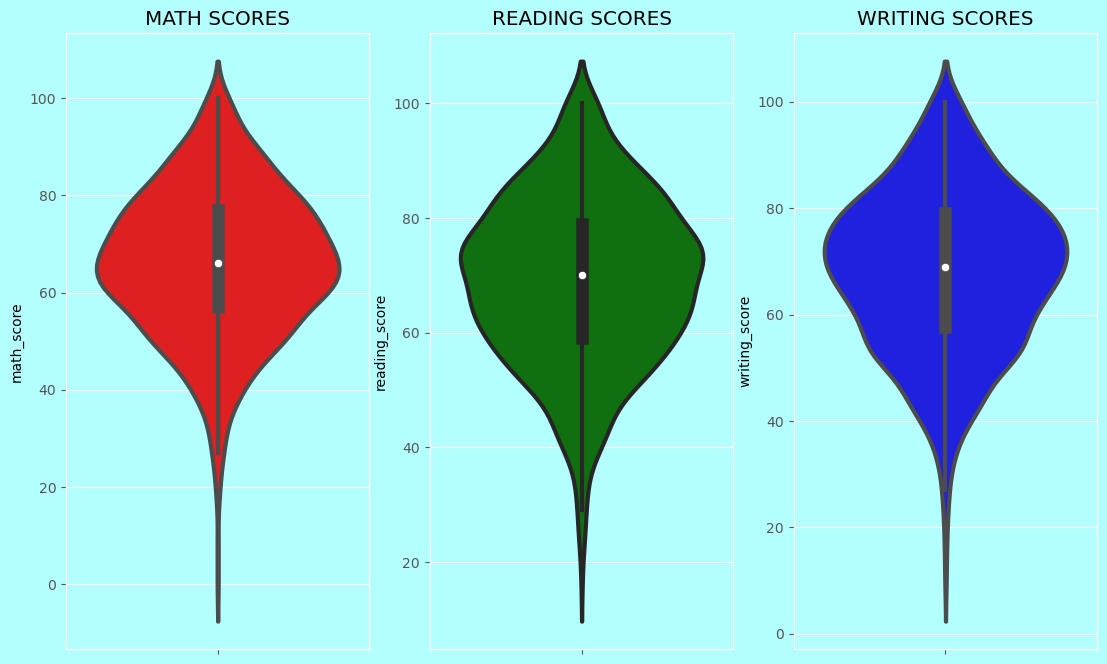

In [41]:
# Visualization of math scores, reading scores and writing scores with seaborn violin plot
plt.rcParams['axes.facecolor'] = "#b3ffff"
plt.rcParams['figure.facecolor'] ="#b3ffff"
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80 (Yukarıdaki üç çizimden, öğrencilerin çoğunun Matematikte 60-80 arasında puan aldığı, okuma ve yazmada ise çoğunun 50-80 arasında puan aldığı açıkça görülmektedir.)

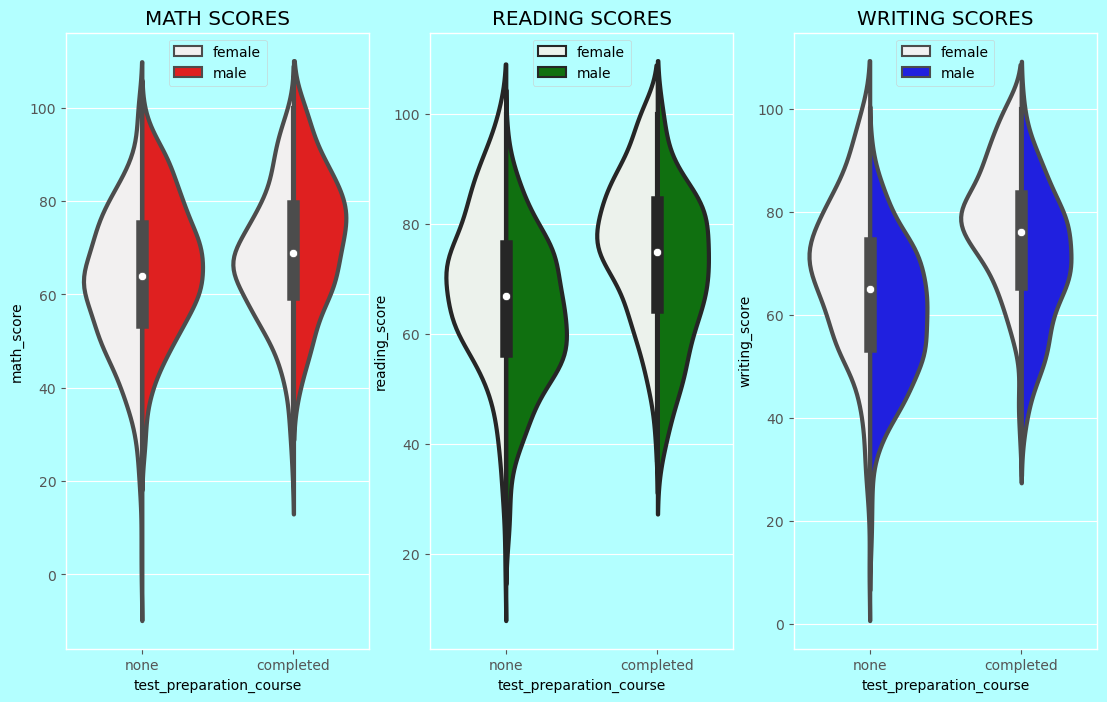

In [49]:
plt.rcParams['axes.facecolor'] = "#b3ffff"
plt.rcParams['figure.facecolor'] ="#b3ffff"
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(x='test_preparation_course',y='math_score',data=df,color='red',linewidth=3,hue="gender", split=True)
plt.legend( loc =9)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(x='test_preparation_course',y='reading_score',data=df,color='green',linewidth=3,hue="gender", split=True)
plt.legend( loc =9)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(x='test_preparation_course',y='writing_score',data=df,color='blue',linewidth=3,hue="gender", split=True)
plt.legend( loc =9)
plt.show()

Kurslari tamamlayan ogrenciler kismen daha basarili
Matematikte kursu bitirmeyen erkek ogrenciler kursu bitirmeyen kiz ogrencilere gore daha basarili ama diger derslerde durum tam tersi

## barplot/test_preparation_course, math scores, reading scores and writing scores with gender

Some fancy arugments that can be passed to (Geçilebilecek bazı süslü argümanlar)`**kwargs`

    * 'hatch' : {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
    * 'linestyle' : {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
    * 'alpha' : {0.0-1.0}

In [ ]:
# Visualization of course attendance status by grouping math scores, reading scores and writing scores by gender using the Seaborn bar plot and hue parameter


## pairplot/the relative status of math scores, reading scores, writing scores and total scores

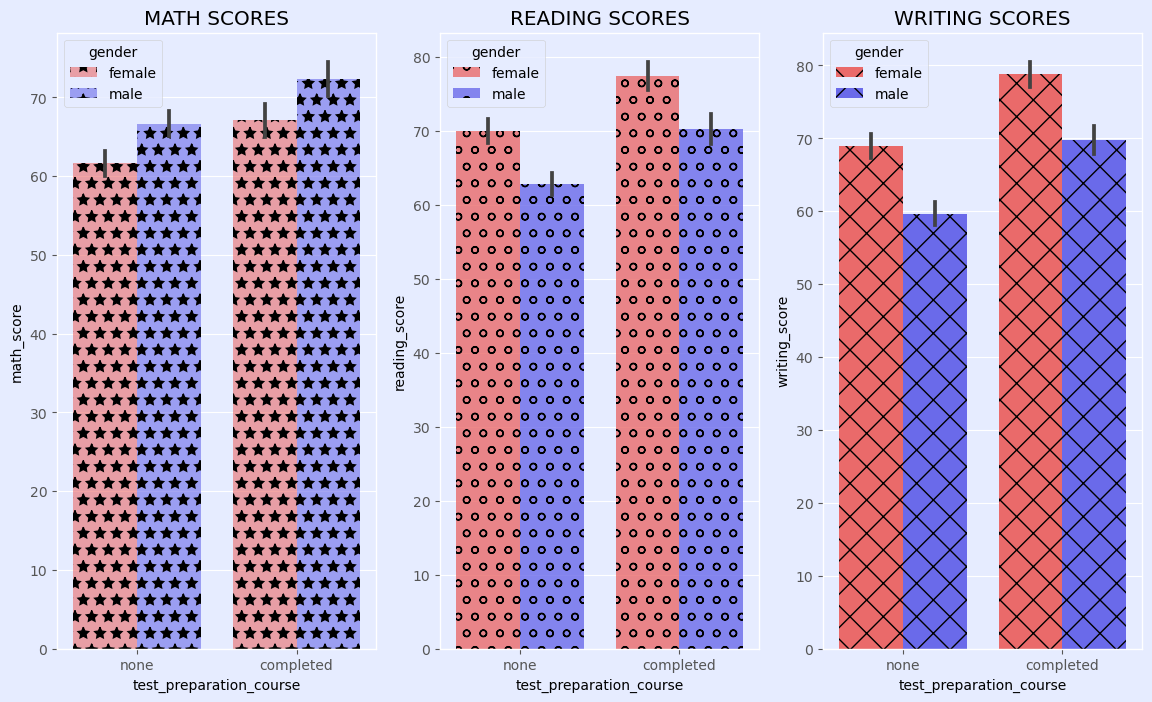

In [58]:
# With the Seaborn pairplot, the relative status of math scores, reading scores, writing scores and total scores were grouped according to gender using the hue parameter.
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test_preparation_course',y='math_score',data=df,hue='gender',palette='seismic_r',**{'hatch':'*','alpha':0.6,'linewidth':2})
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test_preparation_course',y='reading_score',data=df,hue='gender',palette='seismic_r',**{'hatch':'o','alpha':0.8,'linewidth':2})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test_preparation_course',y='writing_score',data=df,hue='gender',palette='seismic_r',**{'hatch':'x','linewidth':2})
plt.title('WRITING SCORES')
plt.show()

From the first plot we can see the math scores of boys are better irrespective of wether they completed the course or no.(İlk arsadan, kursu tamamlayıp tamamlamadıklarına bakılmaksızın erkeklerin matematik puanlarının daha iyi olduğunu görebiliriz.)
From the next two plots we can see that girls perform more better in reading and writing (Sonraki iki çizimden, kızların okuma ve yazmada daha iyi performans gösterdiğini görebiliriz.)
From all three graphs its clear that if the course is completed we can achieve higher scores (Her üç grafikten de, kurs tamamlanırsa daha yüksek puanlar elde edebileceğimiz açıktır.)
We are increasing alpha by 0.2 starting from 0.6-1.0 (0.6-1.0'dan başlayarak alfayı 0.2 artırıyoruz)

## pairplot/the relative status of math scores, reading scores, writing scores and total scores

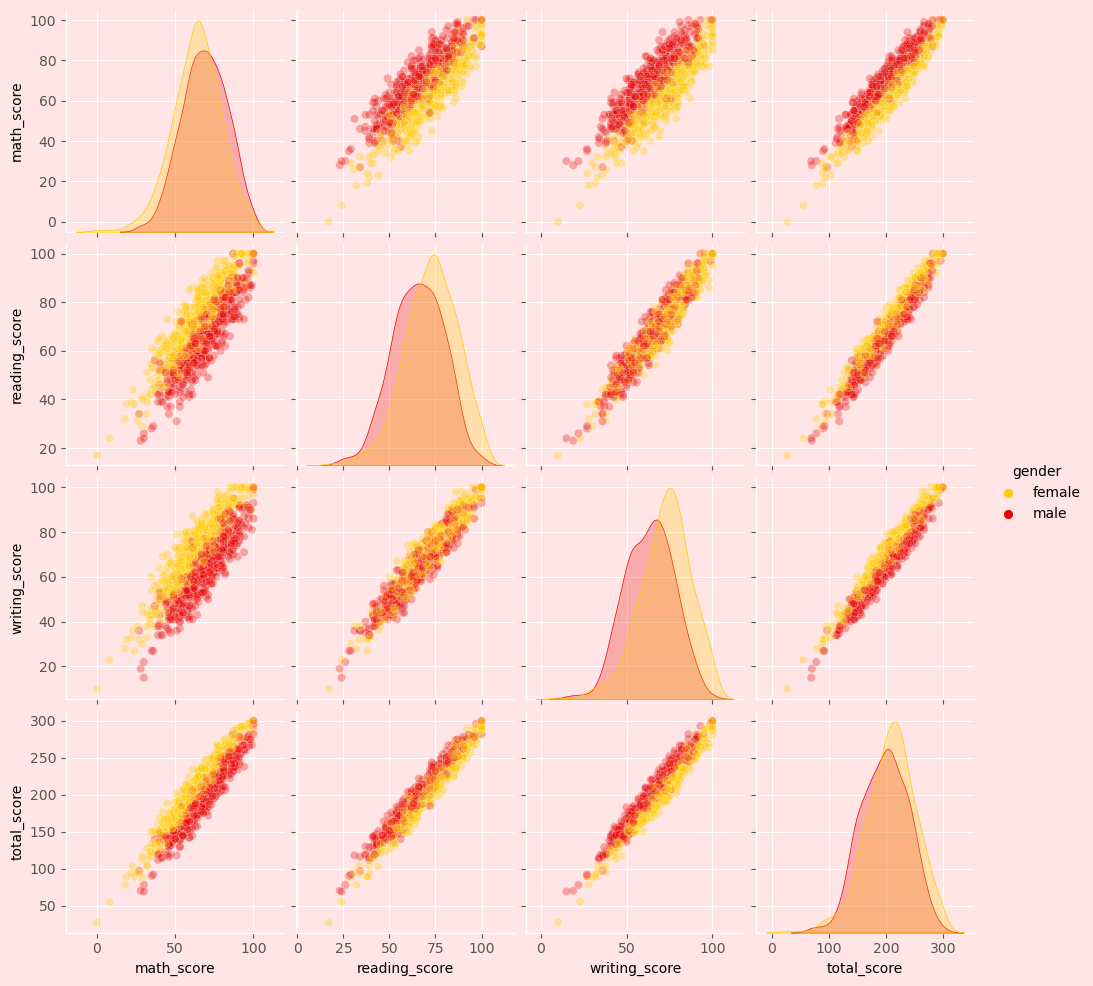

In [56]:
# With the Seaborn pairplot, the relative status of math scores, reading scores, writing scores and total scores were grouped according to gender using the hue parameter.
plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.3},palette='hot_r')
plt.show()

In [ ]:
From the above plot it is clear that all the scores increase linearly with each other.(Yukarıdaki çizimden, tüm puanların birbiriyle doğrusal olarak arttığı açıktır)

In [63]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

## heatmap

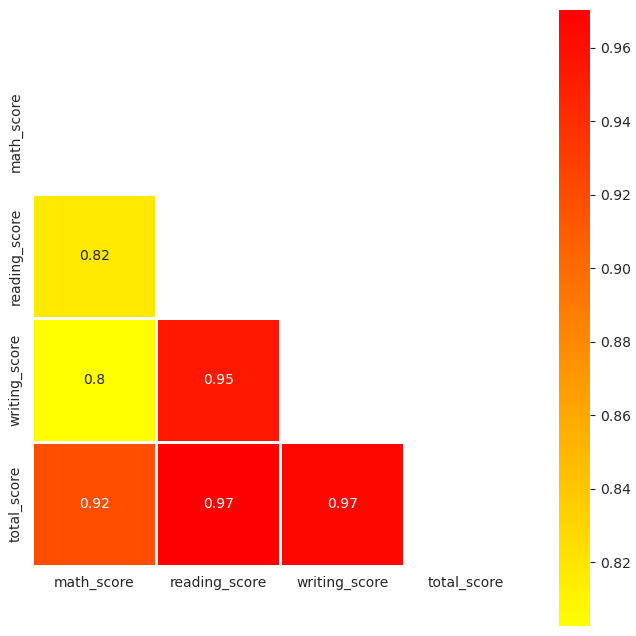

In [72]:
# heatmap graph with seaborn
corr = df.corr()
mask = np.zeros_like(corr) # corr kalibini 0 ile dolduruyor
mask[np.triu_indices_from(mask)] = True # mask'ın üst üçgeni için indisleri döndürür.ust ucgene 0 doldurdu
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn_r",annot=True) 

Points noted from above heatmap:(Yukarıdaki ısı haritasından not edilen noktalar:)
* High correlations between `total_scores` and individual_scores (Toplam_skorlar ve bireysel_skorlar arasında yüksek korelasyonlar,toplam skor ile en yuksek pozitif yonlu iliskiye sahip olanlara reading ve writing dersleridir)
* `Writing_score` and `reading_score` are also highly correlated which tells us that if a student reads well then he/she also writes well.(Yazma_skoru ve okuma_skoru da yüksek oranda ilişkilidir ve bu da bize bir öğrencinin iyi okuması durumunda iyi yazdığını söyler.)
* `Math_score` doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa(Math_score'un çok yüksek bir korelasyonu yoktur, bu nedenle, bir öğrencinin matematikte iyi performans göstermesi durumunda diğer yönlerde de iyi performans göstermesi veya tam tersi gerekli değildir.)

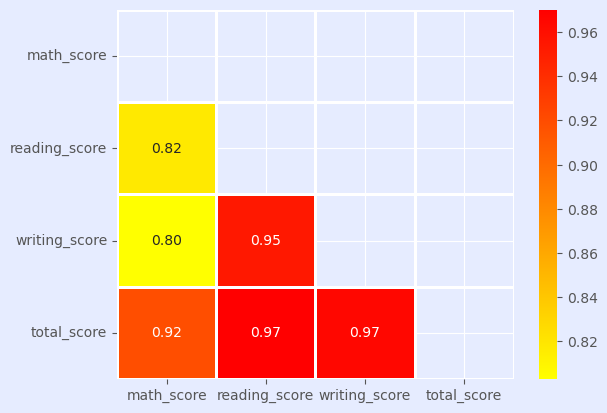

In [71]:
#2.yol
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f", cmap='autumn_r')
plt.show()

## barplot/test preparation course, math scores, reading scores and writing scores with lunch

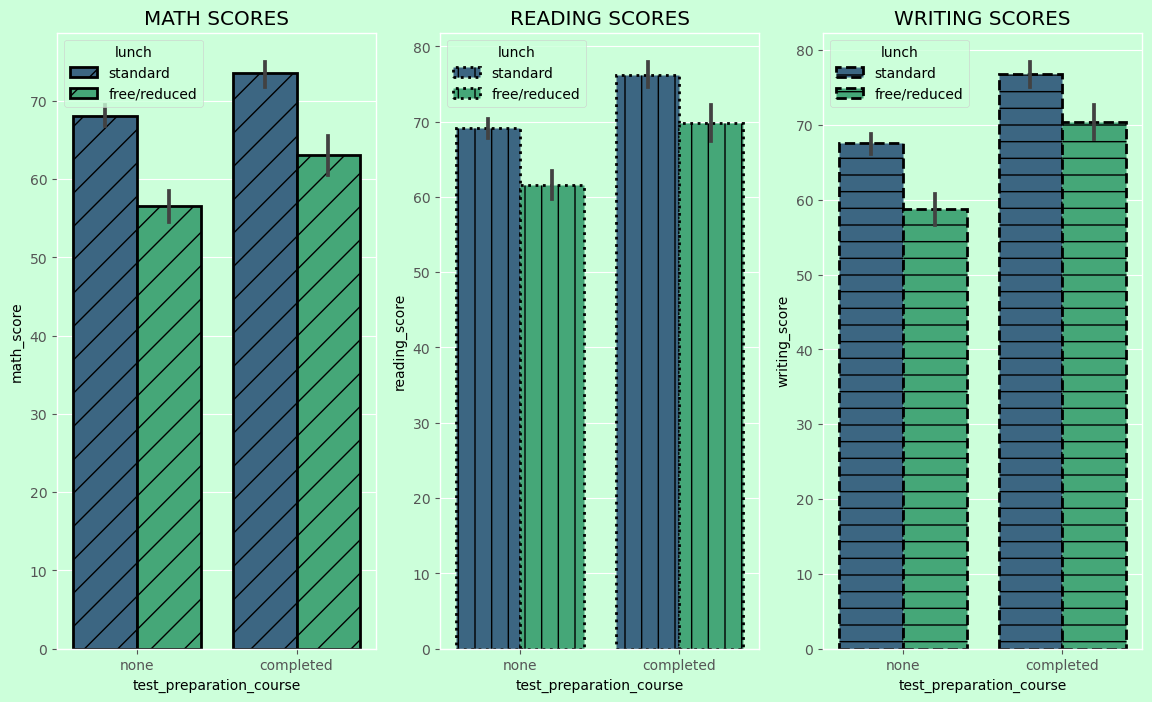

In [73]:
# Visualization of course attendance status by grouping math scores, reading scores and writing scores by lunch using the Seaborn bar plot and hue parameter
# Visualization of course attendance status by grouping math scores, reading scores and writing scores by lunch using the Seaborn bar plot and hue parameter
plt.rcParams['axes.facecolor'] = "#ccffda"
plt.rcParams['figure.facecolor'] = "#ccffda"

plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test_preparation_course',y='math_score',data=df,hue='lunch',palette='viridis',edgecolor='black',**{'hatch':'/','linewidth':2})
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test_preparation_course',y='reading_score',data=df,hue='lunch',palette='viridis',edgecolor='black',**{'hatch':"|",'linewidth':2,'linestyle':':'})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test_preparation_course',y='writing_score',data=df,hue='lunch',palette='viridis',edgecolor='black',**{'hatch':'-','linewidth':2,'linestyle':'--'})
plt.title('WRITING SCORES')
plt.show()

In all the cases the scores are higher by having the standard lunch.(Tüm durumlarda, standart öğle yemeği yiyerek puanlar daha yüksektir.)

## **Checking out the toppers.** (En yuksek puanlari olanlar))

In [ ]:
# data with math score, reading score and writing score above 90

In [ ]:
# Sorting the data with math score, reading score and writing score above 90 according to the total score from largest to smallest

## barplot/race_ethnicity, math scores, reading scores and writing scores with gender

In [74]:
# Visualization of race_ethnic math scores, reading scores and writing scores by grouping them by gender using the seaborn bar plot and hue parameter
# data with math score, reading score and writing score above 90
df[(df['math_score'] > 90) & (df['reading_score'] > 90) & (df['writing_score']>90)]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
114,female,group E,bachelor's degree,standard,completed,99.0,100,100,299
149,male,group E,associate's degree,free/reduced,completed,100.0,100,93,293
165,female,group C,bachelor's degree,standard,completed,96.0,100,100,296
179,female,group D,some high school,standard,completed,97.0,100,100,297
451,female,group E,some college,standard,none,100.0,92,97,289
458,female,group E,bachelor's degree,standard,none,100.0,100,100,300
546,female,group A,some high school,standard,completed,92.0,100,97,289
566,female,group E,bachelor's degree,free/reduced,completed,92.0,100,100,292
571,male,group A,bachelor's degree,standard,none,91.0,96,92,279
594,female,group C,bachelor's degree,standard,completed,92.0,100,99,291


In [75]:
# Sorting the data with math score, reading score and writing score above 90 according to the total score from largest to smallest
df[(df['math_score'] > 90) & (df['reading_score'] > 90) & (df['writing_score']>90)]\
.sort_values(by=['total_score'],ascending=False)
# ters slash ile kodu alt satirda devam edebiliyoruz

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
962,female,group E,associate's degree,standard,none,100.0,100,100,300
458,female,group E,bachelor's degree,standard,none,100.0,100,100,300
916,male,group E,bachelor's degree,standard,completed,100.0,100,100,300
114,female,group E,bachelor's degree,standard,completed,99.0,100,100,299
179,female,group D,some high school,standard,completed,97.0,100,100,297
712,female,group D,some college,standard,none,98.0,100,99,297
625,male,group D,some college,standard,completed,100.0,97,99,296
165,female,group C,bachelor's degree,standard,completed,96.0,100,100,296
903,female,group D,bachelor's degree,free/reduced,completed,93.0,100,100,293
149,male,group E,associate's degree,free/reduced,completed,100.0,100,93,293


The first two toppers are either geniuses or they did some malpractice as their test preparation course was none. (İlk iki birinciler ya dahidir ya da sınava hazırlık kursları hiç olmadığı için bazı hatalı uygulamalar yapmışlardır.)

## barplot/race_ethnicity, math scores, reading scores and writing scores with gender

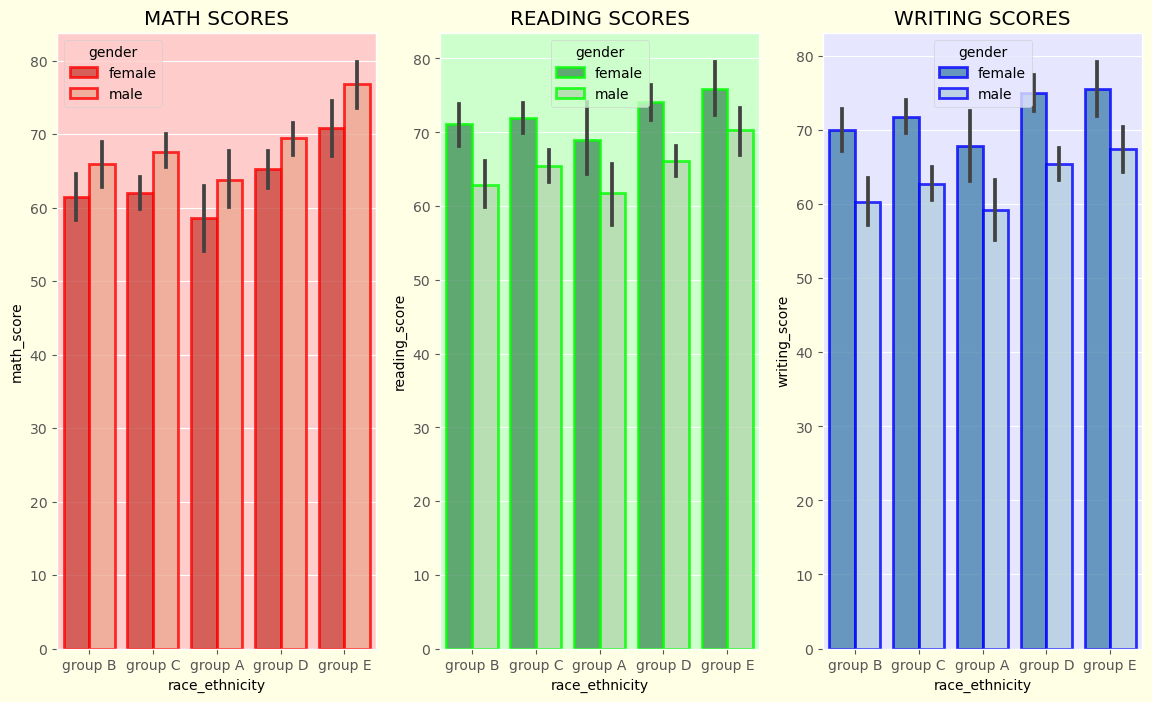

In [78]:
# # Visualization of race_ethnic math scores, reading scores and writing scores by grouping them by gender using the seaborn bar plot and hue parameter
plt.rcParams['figure.facecolor'] = "#ffffe6"

plt.rcParams['axes.facecolor'] = "#ffcccc"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race_ethnicity',y='math_score',data=df,hue='gender',palette='Reds_r',edgecolor='#ff0000',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#ccffcc"
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race_ethnicity',y='reading_score',data=df,hue='gender',palette='Greens_r',edgecolor='#00ff00',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#e6e6ff"
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race_ethnicity',y='writing_score',data=df,hue='gender',palette='Blues_r',edgecolor='#0000ff',**{'alpha':0.8,'linewidth':2})
plt.show()

The above plot shows in depth how people score from different groups.(Yukarıdaki grafik, insanların farklı gruplardan nasıl puan aldıklarını derinlemesine göstermektedir.)

## countplot/parental level of education

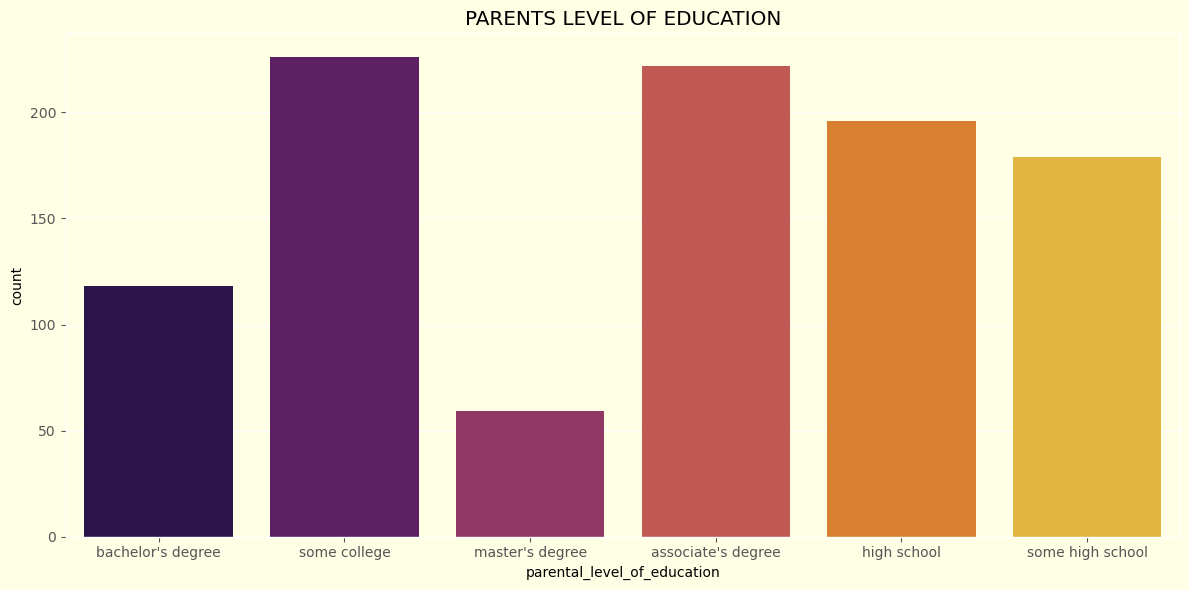

In [76]:
# Visualization of parental level of education with seaborn countplot
plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION')
sns.countplot(x='parental_level_of_education',data=df,palette='inferno')
plt.tight_layout()

Thw above plot shows most of the parents went to some college or had associate's degree and there are very less people who had higher studies. (Yukarıdaki grafik, ebeveynlerin çoğunun bir üniversiteye gittiğini veya ön lisans derecesine sahip olduğunu ve daha yüksek eğitim almış çok az insan olduğunu göstermektedir.)

## barplot/parental level of education,total score

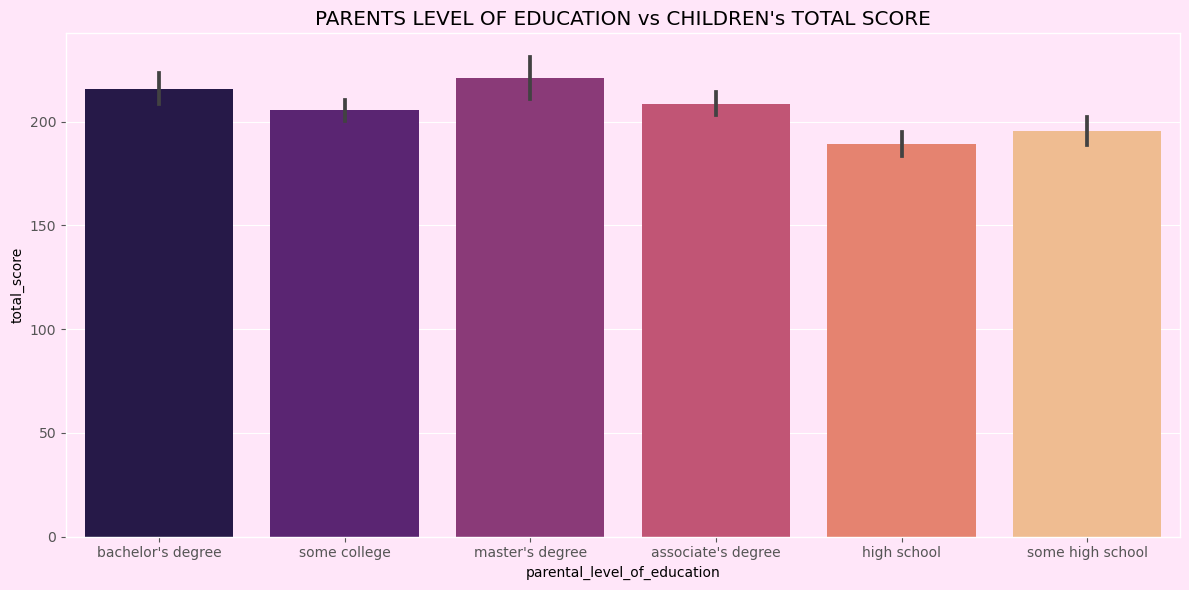

In [77]:
# Visualizing how parental education level affects the total score with the seaborn barplot
plt.rcParams['figure.facecolor'] = "#ffe6f9"
plt.rcParams['axes.facecolor'] = "#ffe6f9"
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION vs CHILDREN\'s TOTAL SCORE')
sns.barplot(x=df['parental_level_of_education'],y='total_score',data=df,palette='magma')
plt.tight_layout()


From the above plot its clear that if the parental education is better their children tend to score better in all areas (math, reading, writing). (Yukarıdaki grafikten de anlaşılacağı üzere, ebeveynlerin eğitimi daha iyiyse, çocukları tüm alanlarda (matematik, okuma, yazma) daha iyi puan alma eğilimindedir.)

Parameters that can be passed to `palette` and each palette has `_r` which means reversed:Palete iletilebilen parametreler ve her paletin tersine çevrilmiş anlamına gelen _r değeri vardır:

        Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, 
        BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, 
        Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, 
        Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, 
        PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, 
        Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, 
        PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples,
        Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, 
        RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
        Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
        Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, 
        YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, 
        afmhot_r, autumn, autumn_r, binary, binary_r, bone, 
        bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r,
        cool, cool_r, coolwarm, coolwarm_r, copper, copper_r,
        cubehelix, cubehelix_r, flag, flag_r, gist_earth, 
        gist_earth_r, gist_gray, gist_gray_r, gist_heat,
        gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow,
        gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, 
        gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r,
        gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, 
        inferno, inferno_r, jet, jet_r,magma, magma_r, mako, 
        mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, 
        pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, 
        rainbow_r, rocket, rocket_r, seismic, seismic_r, spring,
        spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, 
        tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
        viridis, viridis_r, vlag, vlag_r, winter, winter_r

# Thank you